# Importação da biblioteca e banco de dados

In [1]:
#Importação da biblioteca usada no estudo

import pandas as pd

In [2]:
# Base de dados usada proveniente do Kaggle: https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset/discussion/166154

videogames = pd.read_csv(r'C:\Users\WINDOWS 10\OneDrive\Jupyter\Video_Games_Sales_as_at_22_Dec_2016.csv')

Nossa base de dados, intitulada "Video Games Sales Dataset", engloba diversas informações relacionadas ao mercado de jogos mundial, incluindo: nome do jogo, plataforma, ano de lançamento, gênero, publicadora, vendas na América do Norte, vendas na Europa, vendas no Japão, vendas em outros territórios, vendas globais totais (todas as métricas em milhões de unidades vendidas), notas da crítica, notas dos usuários, desenvolvedora e classificação indicativa.

Ressalta-se que todos os valores se referem à venda de mídias físicas, além de terem sido registrados até o ano de 2016, e não englobam títulos criados por desenvolvedores independentes.

In [3]:
# Essas são as primeiras linhas do nosso Dataframe
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


# Remoção das colunas não utilizadas

Como nossa análise é focada nas vendas dos jogos, as colunas referentes às notas da crítica e do público, além da classificação indicativa, serão removidas.

In [5]:
videogames.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'Rating', 'User_Count'], axis=1, errors='ignore', inplace=True)

In [6]:
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


Serão removidas também as linhas que possuem valores nulos nas seguintes colunas: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, com o intuito de não alterar nossos valores finais.

In [7]:
videogames = videogames.dropna(subset=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 
                                       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

# CONVERSÃO DE DADOS

Neste momento, a coluna 'Year_of_Release', que se refere ao ano de lançamento do jogo, foi alterada do formato float64 para int.

In [8]:
videogames['Year_of_Release'] = videogames['Year_of_Release'].astype('int')

In [9]:
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


# Renomeando colunas

As colunas presentes no DataFrame terão seus nomes traduzidos para melhor compreensão da análise.

In [10]:
videogames.rename(columns={
    'Name': 'Nome do Jogo',
    'Platform': 'Plataforma',
    'Year_of_Release': 'Ano de Lançamento',
    'Genre': 'Gênero',
    'Publisher': 'Publicadora',
    'NA_Sales': 'Vendas na América do Norte',
    'Vendas na América do Norte (Em milhões de UN)': 'Vendas na América do Norte',
    'EU_Sales': 'Vendas na Europa',
    'JP_Sales': 'Vendas no Japão',
    'Other_Sales': 'Outras Vendas',
    'Global_Sales': 'Vendas Globais',
    'Developer': 'Desenvolvedora'
}, inplace = True)

In [11]:
videogames.head()

,Nome do Jogo,Plataforma,Ano de Lançamento,Gênero,Publicadora,Vendas na América do Norte,Vendas na Europa,Vendas no Japão,Outras Vendas,Vendas Globais,Desenvolvedora
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


# ANÁLISE EXPLORATÓRIA

## Os 10 jogos mais vendidos até o ano de 2016 na América do norte.

In [12]:
Maiores_Vendas_An = (videogames.groupby(['Nome do Jogo',                                      
                                         'Gênero',
                                         'Publicadora'])
                     ['Vendas na América do Norte'].sum().reset_index().sort_values(by='Vendas na América do Norte', ascending=False))

In [13]:
Maiores_Vendas_An.head(10).reset_index(drop=True)

,Nome do Jogo,Gênero,Publicadora,Vendas na América do Norte
0,Wii Sports,Sports,Nintendo,41.36
1,Super Mario Bros.,Platform,Nintendo,32.48
2,Duck Hunt,Shooter,Nintendo,26.93
3,Tetris,Puzzle,Nintendo,26.17
4,Grand Theft Auto V,Action,Take-Two Interactive,23.84
5,Call of Duty: Black Ops,Shooter,Activision,16.99
6,Super Mario World,Platform,Nintendo,15.99
7,Mario Kart Wii,Racing,Nintendo,15.68
8,Wii Sports Resort,Sports,Nintendo,15.61
9,Call of Duty: Modern Warfare 3,Shooter,Activision,15.54


## Os 10 jogos mais vendidos até o ano de 2016 na Europa.

In [14]:
Maiores_Vendas_Eu = (videogames.groupby(['Nome do Jogo',                                         
                                         'Gênero',
                                         'Publicadora'])
                     ['Vendas na Europa'].sum().reset_index().sort_values(by='Vendas na Europa', ascending=False)) 

In [15]:
Maiores_Vendas_Eu.head(10).reset_index(drop=True)

,Nome do Jogo,Gênero,Publicadora,Vendas na Europa
0,Wii Sports,Sports,Nintendo,28.96
1,Grand Theft Auto V,Action,Take-Two Interactive,23.42
2,Mario Kart Wii,Racing,Nintendo,12.76
3,FIFA 15,Sports,Electronic Arts,12.02
4,Call of Duty: Modern Warfare 3,Shooter,Activision,11.15
5,FIFA 16,Sports,Electronic Arts,11.09
6,FIFA 14,Sports,Electronic Arts,10.96
7,Nintendogs,Simulation,Nintendo,10.95
8,Wii Sports Resort,Sports,Nintendo,10.93
9,Call of Duty: Black Ops II,Shooter,Activision,10.84


## Os 10 jogos mais vendidos até o ano de 2016 no Japão.

In [16]:
Maiores_Vendas_Jp = (videogames.groupby(['Nome do Jogo',                                         
                                         'Gênero',
                                         'Publicadora'])
                     ['Vendas no Japão'].sum().reset_index().sort_values(by='Vendas no Japão', ascending=False))

In [17]:
Maiores_Vendas_Jp.head(10).reset_index(drop=True)

,Nome do Jogo,Gênero,Publicadora,Vendas no Japão
0,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,10.22
1,Pokemon Gold/Pokemon Silver,Role-Playing,Nintendo,7.20
2,Super Mario Bros.,Platform,Nintendo,6.96
3,New Super Mario Bros.,Platform,Nintendo,6.50
4,Pokemon Diamond/Pokemon Pearl,Role-Playing,Nintendo,6.04
5,Tetris,Puzzle,Nintendo,6.03
6,Pokemon Black/Pokemon White,Role-Playing,Nintendo,5.65
7,Pokemon Ruby/Pokemon Sapphire,Role-Playing,Nintendo,5.38
8,Animal Crossing: Wild World,Simulation,Nintendo,5.33
9,Brain Age 2: More Training in Minutes a Day,Puzzle,Nintendo,5.32


## Os 10 jogos mais vendidos até o ano de 2016 no restante do mundo.

In [18]:
Maiores_Vendas_Ov = (videogames.groupby(['Nome do Jogo',                                         
                                         'Gênero',
                                         'Publicadora'])
                     ['Outras Vendas'].sum().reset_index().sort_values(by='Outras Vendas', ascending=False))

In [19]:
Maiores_Vendas_Ov.head(10).reset_index(drop=True)

,Nome do Jogo,Gênero,Publicadora,Outras Vendas
0,Grand Theft Auto: San Andreas,Action,Take-Two Interactive,10.71
1,Wii Sports,Sports,Nintendo,8.45
2,Grand Theft Auto V,Action,Take-Two Interactive,7.90
3,Gran Turismo 4,Racing,Sony Computer Entertainment,7.53
4,Call of Duty: Black Ops II,Shooter,Activision,3.76
5,FIFA Soccer 08,Sports,Electronic Arts,3.52
6,Pro Evolution Soccer 2008,Sports,Konami Digital Entertainment,3.51
7,Call of Duty: Black Ops 3,Shooter,Activision,3.49
8,Call of Duty: Modern Warfare 3,Shooter,Activision,3.29
9,Mario Kart Wii,Racing,Nintendo,3.29


## Os 10 jogos mais vendidos até o ano de 2016 mundialmente.

In [20]:
Maiores_Vendas_Mundo = (videogames.groupby(['Nome do Jogo',                                      
                                            'Gênero',
                                            'Publicadora'])
                     ['Vendas Globais'].sum().reset_index().sort_values(by='Vendas Globais', ascending=False))

In [21]:
Maiores_Vendas_Mundo.head(10).reset_index(drop=True)

,Nome do Jogo,Gênero,Publicadora,Vendas Globais
0,Wii Sports,Sports,Nintendo,82.53
1,Grand Theft Auto V,Action,Take-Two Interactive,56.57
2,Super Mario Bros.,Platform,Nintendo,45.31
3,Tetris,Puzzle,Nintendo,35.84
4,Mario Kart Wii,Racing,Nintendo,35.52
5,Wii Sports Resort,Sports,Nintendo,32.77
6,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,31.37
7,Call of Duty: Modern Warfare 3,Shooter,Activision,30.59
8,New Super Mario Bros.,Platform,Nintendo,29.80
9,Call of Duty: Black Ops II,Shooter,Activision,29.40


# MAIS VENDIDOS POR PLATAFORMAS

É possível destacar que as maiores plataformas no quesito vendas de jogos são: Sony, Microsoft e Nintendo. Dentre elas, podemos demonstrar quais jogos foram os mais vendidos nos principais consoles de cada empresa.

## SONY

In [22]:
Filtro_Sony = videogames['Plataforma'].isin(['PS3', 'PS2', 'PS4', 'PS', 'PSP', 'PSV'])

Maiores_Vendas_Sony = (videogames.loc[Filtro_Sony]
                       .groupby(['Plataforma', 'Nome do Jogo'])['Vendas Globais']
                       .sum()
                       .reset_index())

idx = Maiores_Vendas_Sony.groupby('Plataforma')['Vendas Globais'].idxmax()

Maiores_Jogos_Sony = Maiores_Vendas_Sony.loc[idx].set_index('Plataforma')

In [23]:
Maiores_Jogos_Sony

,Nome do Jogo,Vendas Globais
Plataforma,,
PS,Gran Turismo,10.95
PS2,Grand Theft Auto: San Andreas,20.81
PS3,Grand Theft Auto V,21.04
PS4,Call of Duty: Black Ops 3,14.63
PSP,Grand Theft Auto: Liberty City Stories,7.69
PSV,Minecraft,1.96


## MICROSOFT

In [24]:
Filtro_Microsoft = videogames['Plataforma'].isin(['X360', 'XB', 'PC', 'XOne'])

Maiores_Vendas_Microsoft = (videogames.loc[Filtro_Microsoft]
                       .groupby(['Plataforma', 'Nome do Jogo'])['Vendas Globais']
                       .sum()
                       .reset_index())

idx = Maiores_Vendas_Microsoft.groupby('Plataforma')['Vendas Globais'].idxmax()

Maiores_Jogos_Microsoft = Maiores_Vendas_Microsoft.loc[idx].set_index('Plataforma')

In [25]:
Maiores_Jogos_Microsoft

,Nome do Jogo,Vendas Globais
Plataforma,,
PC,The Sims 3,8.01
X360,Kinect Adventures!,21.81
XB,Halo 2,8.49
XOne,Call of Duty: Black Ops 3,7.39


## NINTENDO

In [26]:
Filtro_Nintendo = videogames['Plataforma'].isin(['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'WiiU'])

Maiores_Vendas_Nintendo = (videogames.loc[Filtro_Nintendo]
                       .groupby(['Plataforma', 'Nome do Jogo'])['Vendas Globais']
                       .sum()
                       .reset_index())

idx = Maiores_Vendas_Nintendo.groupby('Plataforma')['Vendas Globais'].idxmax()

Maiores_Jogos_Nintendo = Maiores_Vendas_Nintendo.loc[idx].set_index('Plataforma')

In [27]:
Maiores_Jogos_Nintendo

,Nome do Jogo,Vendas Globais
Plataforma,,
3DS,Pokemon X/Pokemon Y,14.60
DS,New Super Mario Bros.,29.80
GB,Pokemon Red/Pokemon Blue,31.37
GBA,Pokemon Ruby/Pokemon Sapphire,15.85
N64,Super Mario 64,11.89
NES,Super Mario Bros.,40.24
SNES,Super Mario World,20.61
Wii,Wii Sports,82.53
WiiU,Mario Kart 8,7.09


# MAIS VENDIDOS POR GÊNERO

## Gêneros mais vendidos

Podemos realizar uma análise baseada nos gêneros dos jogos, identificando assim, quais foram os gêneros mais rentáveis.

In [28]:
Generos_Mais_Vendidos = videogames.groupby('Gênero')[['Vendas na América do Norte',
                                                       'Vendas na Europa',
                                                       'Vendas no Japão',
                                                       'Outras Vendas',
                                                       'Vendas Globais']].sum().sort_values(by='Vendas Globais', ascending=False)

In [29]:
Generos_Mais_Vendidos

,Vendas na América do Norte,Vendas na Europa,Vendas no Japão,Outras Vendas,Vendas Globais
Gênero,,,,,
Action,863.17,510.99,160.14,182.22,1717.62
Sports,671.20,371.33,134.93,132.21,1310.39
Shooter,584.83,314.52,38.68,103.33,1041.83
Role-Playing,330.04,188.24,353.44,59.41,930.90
Platform,444.44,199.39,130.71,51.01,825.86
Misc,394.01,208.55,107.02,73.00,783.19
Racing,356.86,234.48,56.63,75.51,723.69
Fighting,220.51,99.00,87.28,35.87,442.63
Simulation,180.67,113.17,63.64,30.59,388.22


# Gêneros com mais jogos

Quantidade total de jogos lançados para cada gênero.

In [30]:
Generos_Mais_Vendidos = videogames.groupby('Gênero')[['Vendas na América do Norte',
                                                       'Vendas na Europa',
                                                       'Vendas no Japão',
                                                       'Outras Vendas',
                                                       'Vendas Globais']].sum().sort_values(by='Vendas Globais', ascending=False)

In [31]:
Generos_Maior_Quantidade = videogames.groupby('Gênero')['Gênero'].count().reset_index(name='Quantidade').sort_values(by='Quantidade', ascending=False)

In [32]:
Generos_Maior_Quantidade.reset_index(drop=True)

,Gênero,Quantidade
0,Action,3307
1,Sports,2306
2,Misc,1697
3,Role-Playing,1483
4,Shooter,1296
5,Adventure,1291
6,Racing,1225
7,Platform,878
8,Simulation,855
9,Fighting,837


# Visualização dos dados

In [33]:
# Começamos importando as bibliotecas usadas para a visualização dos dados

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

Usando as plataformas como índice, podemos visualizar quais consoles venderam mais jogos até o ano de 2016

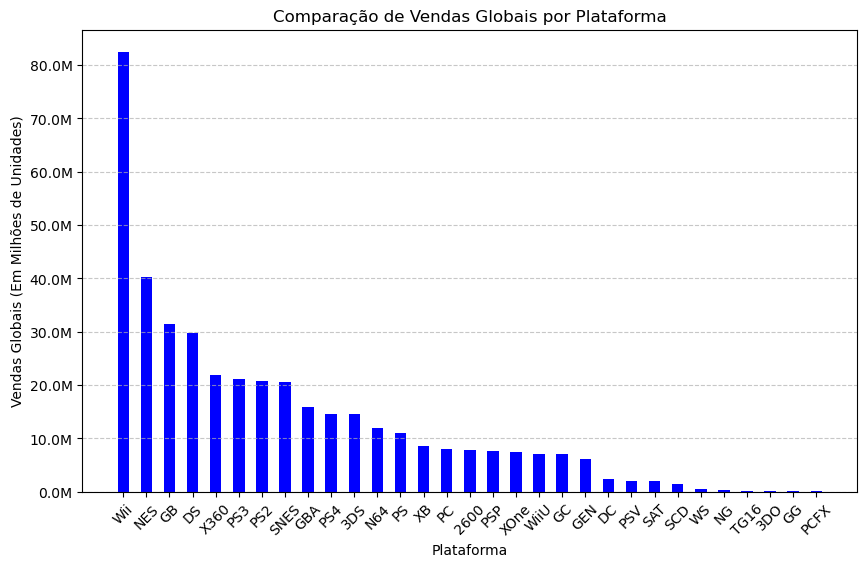

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(videogames['Plataforma'], videogames['Vendas Globais'], width=0.5, color='blue')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (Em Milhões de Unidades)')
plt.title('Comparação de Vendas Globais por Plataforma')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.show()

## Distribuição percentual das vendas Globais de jogos por região

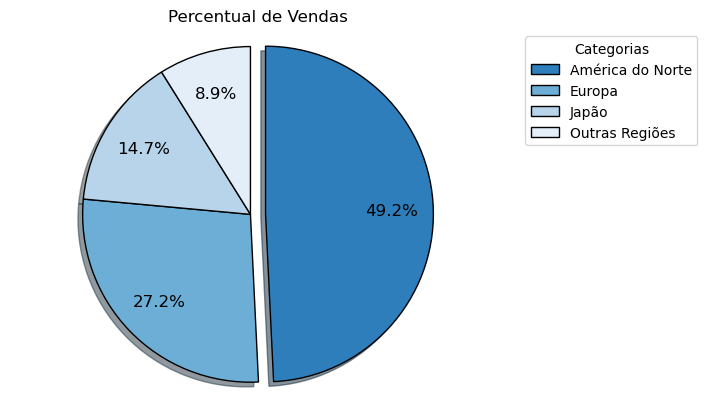

In [35]:
sizes = videogames[['Vendas na América do Norte',
                    'Vendas na Europa',
                    'Vendas no Japão',
                    'Outras Vendas',
                     ]].sum().values
explode = (0.09, 0.0, 0, 0) 
labels = ['América do Norte', 'Europa', 'Japão', 'Outras Regiões']
cmap = plt.get_cmap('Blues_r')
num_colors = 4
colors = [cmap(0.3 + 0.2 * i) for i in range(num_colors)]

plt.pie(
    sizes,
    explode=explode,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    pctdistance=0.75,
    labeldistance=1.1,
    counterclock=False,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': '-'},
    textprops={'fontsize': 12, 'color': 'black'},)

plt.legend(labels, loc="upper right", bbox_to_anchor=(1.4, 1), title="Categorias")
plt.title('Percentual de Vendas')
plt.axis('equal')
plt.show()


# Insights e Conclusões

## Em número de vendas

O jogo mais vendido da história é o **Wii Sports**, que alcançou a marca de **82,53 milhões de unidades vendidas**. Vale ressaltar que esse número inclui as vendas do jogo que eram oferecidas como um brinde junto ao console Nintendo Wii (assim como o jogo **Kinect Adventures** em relação ao Xbox), o que o diferencia de outros títulos na lista.

Ao considerarmos as vendas unitárias de jogos adquiridos separadamente, o título que se destaca como o mais vendido é **Grand Theft Auto V**, com um total de **56,57 milhões de unidades vendidas** em todas as plataformas em que foi disponibilizado.

**A Nintendo consolidou sua liderança no mercado de jogos**, ocupando as primeiras posições em diversos rankings globais. **No Japão, a empresa detém todos os 10 jogos mais vendidos**, enquanto **na América do Norte e no mundo, a Nintendo domina 7 das 10 posições mais cobiçadas**. Esses resultados demonstram o poder de suas franquias e a preferência dos jogadores por seus títulos.

## Em relação as plataformas

**Entre as gigantes do mercado, a Sony enfrenta um dos maiores desafios em termos de vendas em um console específico.** Com o portátil **PlayStation Vita (PSV)**, a empresa **não conseguiu alcançar sequer 2 milhões de unidades vendidas** com seu título de maior sucesso, **Minecraft**.

**Embora a Microsoft possua uma enorme quantidade de vendas de jogos digitais no PC graças à Steam** (cujos valores não estão incluídos na análise em questão), **pode-se observar que a plataforma já viveu dias com muito menos faturamento nas mídias físicas.** Sua maior franquia na era das mídias físicas foi **The Sims**, que atingiu **8,01 milhões de unidades vendidas**. **Um valor modesto** se comparado com os consoles da mesma época, como o **PlayStation 2 (PS2) da Sony** e o **Nintendo 3DS da Nintendo.**



**Ao analisarmos as vendas entre Sony e Microsoft, fica evidente que a primeira empresa se destaca em relação à concorrente.** Quando colocamos os consoles lado a lado, observamos que o principal título do **PlayStation (PS)** vendeu **10,95 milhões de unidades**, enquanto seu concorrente direto, o **Xbox (XB)**, vendeu **8,49 milhões.** Os números se duplicam ao considerarmos a penúltima geração de videogames, onde o **PlayStation 4 (PS4)** vendeu **mais do que o dobro** do título mais popular de seu concorrente, o **Xbox One (XOne)**, ambos tendo o mesmo jogo líder de vendas, **Call of Duty: Black Ops 3**.


## Em relação ao mercado

A **hegemonia da Nintendo** é reafirmada ao analisarmos os consoles que mais venderam jogos. **Os quatro primeiros lugares na lista** são ocupados por consoles da companhia japonesa, que ainda detém **seis dos dez consoles com maiores vendas de jogos em mídias físicas no mercado.**

Este estudo também evidencia o **poder do mercado norte-americano**, que foi responsável por **quase 50% de todas as vendas de jogos de mídia física** em todo o mundo.

Um fator dentro do mercado de venda de jogos que influenciou diretamente as vendas, principalmente fora das grandes potências econômicas, foi a **pirataria**. Países como o Brasil, que são nos dias atuais grandes consumidores de jogos, popularizaram consoles como **PlayStation (PS)** e **PlayStation 2 (PS2)** em suas terras através da pirataria. O preço de um jogo original desses consoles representava entre **76,9% a 99,3% do salário mínimo** da época, tornando a aquisição dessas mídias praticamente impossível.
